## PROTLEARN FEATURE EXTRACTIONS

In [1]:
import protlearn as prl
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno 
import warnings

In [2]:
from protlearn.features import aac
from protlearn.features import aaindex1
from protlearn.features import ngram
from protlearn.features import entropy
from protlearn.features import atc
from protlearn.features import ctd
from protlearn.features import ctdc
from protlearn.features import ctdt
from protlearn.features import apaac

In [3]:
temp_op_data = pd.read_csv("data/tempoptimum_id.csv")

<AxesSubplot: >

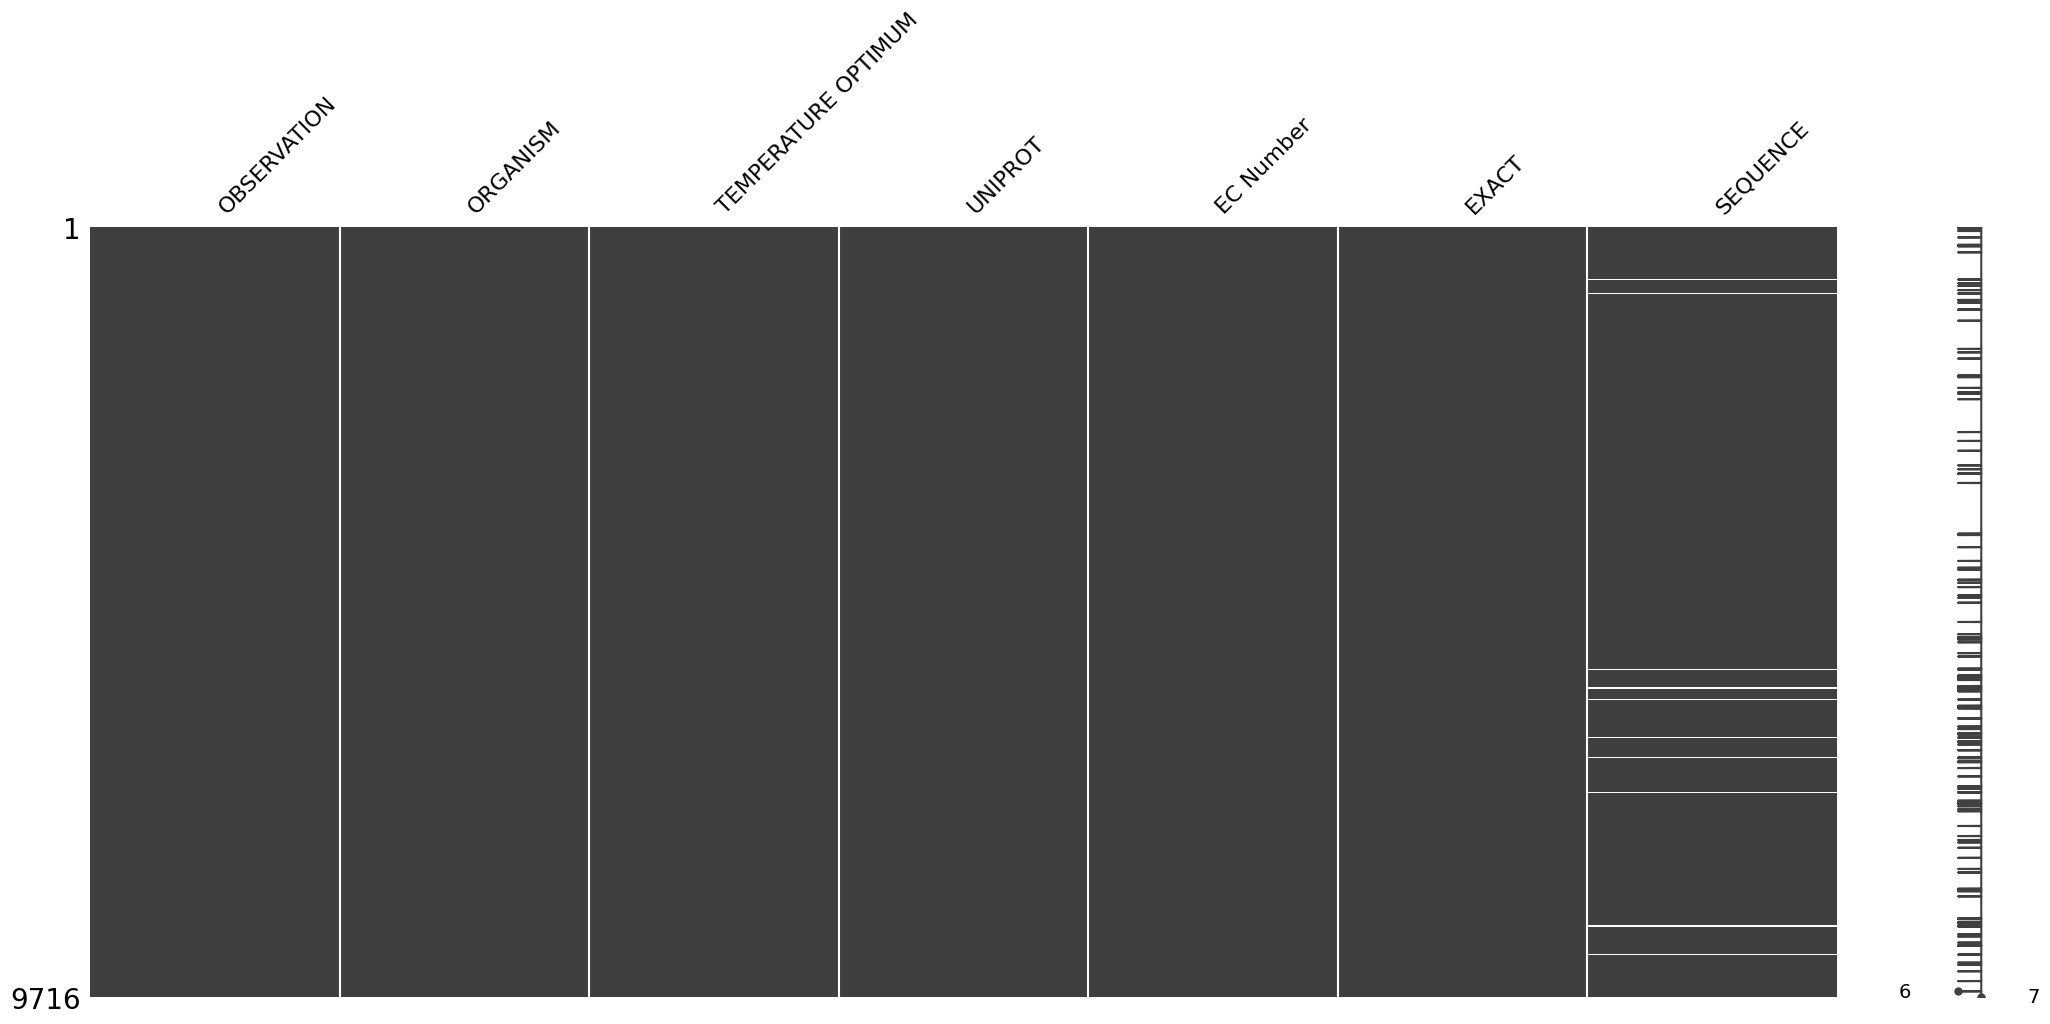

In [4]:
msno.matrix(temp_op_data)

<AxesSubplot: >

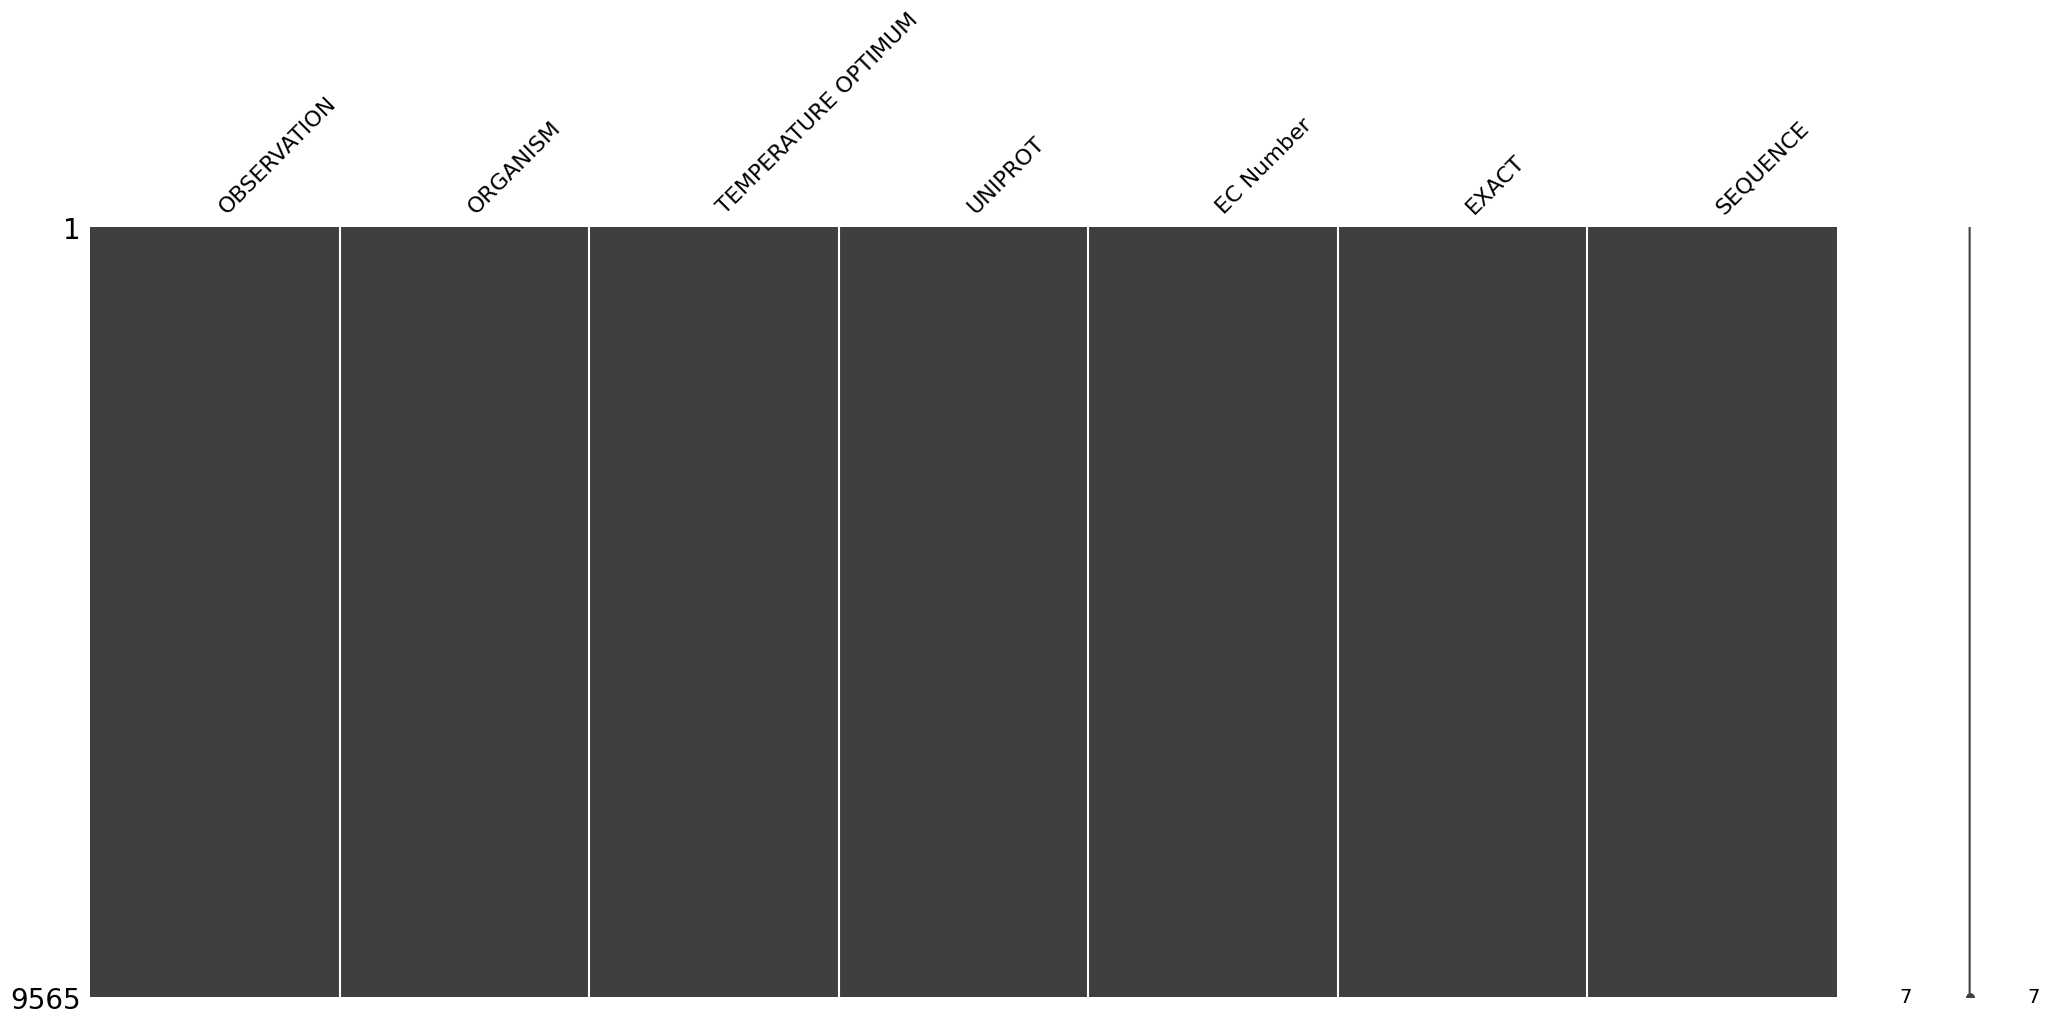

In [5]:
temp_op_data = temp_op_data.dropna()
msno.matrix(temp_op_data)

In [6]:
temp_op_data

,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE
0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...
1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...
2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...
3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...
4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...
...,...,...,...,...,...,...,...
9711,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...
9712,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...
9713,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...
9714,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...


##### AMINO ACID SINGLE DIGIT FEATURE 

In [7]:
comp, aa = aac(temp_op_data.iat[0,6], remove_zero_cols=False)
feature_extraction = pd.DataFrame(comp ,columns =   ["A","C","D","E","F","G","H","I","K","L","M",
                                                  "N","P","Q","R","S","T","V","W","Y"])
feature_extraction

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.09319,0.017921,0.057348,0.046595,0.02509,0.089606,0.017921,0.075269,0.078853,0.064516,0.007168,0.050179,0.043011,0.032258,0.007168,0.086022,0.071685,0.064516,0.02509,0.046595


In [8]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        comp, aa = aac(temp_op_data.iat[i,6], remove_zero_cols=False)
    except:
        comp = [["NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN",
                "NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN"]]
    

    
    append_data = pd.DataFrame(comp ,columns =   ["A","C","D","E","F","G","H","I","K","L","M",
                                                  "N","P","Q","R","S","T","V","W","Y"])
    
    feature_extraction = feature_extraction.append(append_data, ignore_index = True)



In [9]:
feature_extraction

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.09319,0.017921,0.057348,0.046595,0.02509,0.089606,0.017921,0.075269,0.078853,0.064516,0.007168,0.050179,0.043011,0.032258,0.007168,0.086022,0.071685,0.064516,0.02509,0.046595
1,0.063091,0.009464,0.053628,0.063091,0.031546,0.104101,0.012618,0.123028,0.069401,0.082019,0.0347,0.059937,0.0347,0.006309,0.050473,0.047319,0.050473,0.056782,0.003155,0.044164
2,0.097983,0.014409,0.043228,0.072046,0.017291,0.100865,0.020173,0.069164,0.066282,0.092219,0.025937,0.034582,0.043228,0.028818,0.048991,0.040346,0.037464,0.103746,0.005764,0.037464
3,0.130312,0.028329,0.087819,0.062323,0.014164,0.107649,0.033994,0.016997,0.005666,0.084986,0.01983,0.022663,0.053824,0.01983,0.056657,0.050992,0.053824,0.124646,0.014164,0.011331
4,0.083333,0.017241,0.037356,0.074713,0.025862,0.123563,0.031609,0.063218,0.060345,0.077586,0.017241,0.008621,0.057471,0.014368,0.045977,0.037356,0.04023,0.12931,0.020115,0.034483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.108434,0.004016,0.040161,0.040161,0.012048,0.084337,0.040161,0.036145,0.032129,0.156627,0.036145,0.032129,0.044177,0.072289,0.060241,0.068273,0.056225,0.048193,0.016064,0.012048
9561,0.136364,0.005051,0.030303,0.010101,0.065657,0.085859,0.025253,0.040404,0.005051,0.161616,0.025253,0.005051,0.040404,0.015152,0.075758,0.050505,0.050505,0.10101,0.025253,0.045455
9562,0.116541,0.007519,0.041353,0.045113,0.030075,0.048872,0.0,0.071429,0.052632,0.097744,0.011278,0.033835,0.078947,0.097744,0.045113,0.071429,0.030075,0.071429,0.030075,0.018797
9563,0.047855,0.013201,0.049505,0.052805,0.052805,0.072607,0.016502,0.052805,0.037954,0.151815,0.023102,0.021452,0.041254,0.052805,0.056106,0.077558,0.061056,0.062706,0.016502,0.039604


##### AAIndex1-based physicochemical properties.

In [10]:
aaind, inds = aaindex1(temp_op_data.iat[0,6], standardize='none')
feature_extraction_2 = pd.DataFrame(aaind ,columns = inds)
feature_extraction_2

,ANDN920101,ARGP820101,ARGP820102,ARGP820103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,BIOV880101,...,KARS160113,KARS160114,KARS160115,KARS160116,KARS160117,KARS160118,KARS160119,KARS160120,KARS160121,KARS160122
0,4.347455,0.895448,0.911577,0.978781,0.576057,0.729391,0.699713,0.443914,79.766308,7.921147,...,9.892473,15.344986,11.082437,18.949821,29.466753,6.029566,22.369093,-0.511154,9.191713,3.239771


In [11]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    
    
    try:
        aaind, inds = aaindex1(temp_op_data.iat[i,6], standardize='none')
    except:
        x  = np.arange(553, dtype=int)
        aaind = np.full_like(x, np.nan, dtype= np.double)
        aaind = [aaind]
    
    append_data = pd.DataFrame(aaind ,columns = inds)
    
    feature_extraction_2 = feature_extraction_2.append(append_data, ignore_index = True)



In [12]:
feature_extraction_2

,ANDN920101,ARGP820101,ARGP820102,ARGP820103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,BIOV880101,...,KARS160113,KARS160114,KARS160115,KARS160116,KARS160117,KARS160118,KARS160119,KARS160120,KARS160121,KARS160122
0,4.347455,0.895448,0.911577,0.978781,0.576057,0.729391,0.699713,0.443914,79.766308,7.921147,...,9.892473,15.344986,11.082437,18.949821,29.466753,6.029566,22.369093,-0.511154,9.191713,3.239771
1,4.312681,0.973785,0.982902,1.074132,0.603565,0.749748,0.684164,0.447577,82.853943,17.384858,...,10.583596,16.265356,11.675079,19.905363,30.095454,5.951189,22.730912,-0.491274,9.312454,3.097180
2,4.296916,0.927003,0.986945,1.064784,0.625879,0.747291,0.663890,0.441597,81.217579,16.008646,...,10.083573,15.648784,11.172911,19.100865,29.133533,5.939262,22.255069,-0.353452,9.157187,3.136222
3,4.326686,0.802975,0.978385,1.045071,0.611756,0.744249,0.682975,0.438105,75.765722,17.118980,...,9.427762,14.344926,10.167139,17.444759,27.457122,5.933810,21.750649,-0.323258,8.940006,3.422198
4,4.280029,0.983420,0.957787,1.038362,0.613621,0.753649,0.669023,0.440201,81.006322,23.135057,...,9.919540,15.324307,10.839080,18.752874,29.084299,5.824911,21.925899,-0.368264,9.096851,3.309782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,4.331687,0.821285,1.163735,1.201606,0.637149,0.743976,0.679598,0.435727,80.989558,15.554217,...,10.457831,15.874442,11.393574,19.285141,29.454378,5.936659,22.335566,-0.380542,9.205016,3.156373
9561,4.312828,1.049192,1.295606,1.369949,0.672778,0.792222,0.644798,0.418136,83.611616,49.555556,...,10.722222,15.572227,11.151515,18.717172,29.707813,5.825025,21.848197,-0.362788,9.164934,3.208237
9562,4.334850,0.962932,1.043571,1.096729,0.606090,0.736579,0.665526,0.442429,82.840977,12.729323,...,10.718045,15.973233,11.635338,19.127820,30.128556,6.092805,22.904974,-0.265462,9.479305,3.506590
9563,4.337607,0.956419,1.172706,1.197987,0.609505,0.753828,0.684010,0.437858,84.857261,25.146865,...,10.960396,16.775627,11.937294,20.381188,31.507190,6.021535,23.394165,-0.414683,9.581690,3.417677


##### Dipeptide Ngram

In [13]:
di, ngrams = ngram(temp_op_data.iat[0,6], n=2)
feature_extraction_3 = pd.DataFrame(di ,columns = ngrams)
feature_extraction_3

,AA,AC,AD,AE,AF,AG,AH,AI,AK,AL,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
0,0.003597,0.003597,0.007194,0.007194,0.0,0.007194,0.0,0.007194,0.010791,0.0,...,0.0,0.007194,0.0,0.0,0.0,0.0,0.003597,0.0,0.0,0.003597


In [14]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        di, ngrams = ngram(temp_op_data.iat[i,6], n=2,method='relative')
    except:
        x  = np.arange(400, dtype=int)
        di = np.full_like(x, np.nan, dtype= np.double)
        di = [di]
    
    append_data = pd.DataFrame(di ,columns = ngrams)
    feature_extraction_3 = feature_extraction_3.append(append_data, ignore_index = True)

In [19]:
feature_extraction_3

,AA,AC,AD,AE,AF,AG,AH,AI,AK,AL,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
0,0.003597,0.003597,0.007194,0.007194,0.000000,0.007194,0.000000,0.007194,0.010791,0.000000,...,0.00000,0.007194,0.000000,0.000000,0.000000,0.000000,0.003597,0.000000,0.000000,0.003597
1,0.003165,0.000000,0.006329,0.000000,0.000000,0.009494,0.000000,0.006329,0.003165,0.006329,...,0.00000,0.006329,0.000000,0.000000,0.006329,0.003165,0.000000,0.003165,0.000000,0.000000
2,0.008671,0.000000,0.005780,0.008671,0.000000,0.014451,0.000000,0.005780,0.008671,0.002890,...,0.00289,0.000000,0.002890,0.000000,0.002890,0.002890,0.000000,0.008671,0.000000,0.002890
3,0.017045,0.005682,0.017045,0.011364,0.002841,0.011364,0.002841,0.005682,0.000000,0.017045,...,0.00000,0.005682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.011527,0.000000,0.005764,0.005764,0.002882,0.005764,0.000000,0.008646,0.005764,0.005764,...,0.00000,0.000000,0.005764,0.000000,0.002882,0.000000,0.005764,0.000000,0.002882,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.004032,0.000000,0.000000,0.004032,0.000000,0.024194,0.004032,0.004032,0.000000,0.020161,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9561,0.015228,0.000000,0.005076,0.000000,0.000000,0.015228,0.000000,0.015228,0.000000,0.030457,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.005076,0.000000,0.015228,0.005076,0.000000
9562,0.015094,0.000000,0.003774,0.007547,0.003774,0.003774,0.000000,0.003774,0.003774,0.018868,...,0.00000,0.000000,0.003774,0.000000,0.000000,0.003774,0.000000,0.000000,0.003774,0.000000
9563,0.003306,0.000000,0.003306,0.004959,0.004959,0.008264,0.000000,0.001653,0.000000,0.003306,...,0.00000,0.000000,0.003306,0.003306,0.003306,0.000000,0.004959,0.003306,0.000000,0.004959


##### Tripeptide NGRAM

In [103]:
tri, ngrams = ngram(temp_op_data.iat[0,6], n=3, method='absolute')
feature_extraction_4 = pd.DataFrame(tri ,columns = ngrams)
feature_extraction_4

,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        tri, ngrams = ngram(temp_op_data.iat[i,6], n=3, method='absolute')
    except:
        x  = np.arange(8000, dtype=int)
        tri = np.full_like(x, np.nan, dtype= np.double)
        tri = [tri]
    
    append_data = pd.DataFrame(tri ,columns = ngrams)
    feature_extraction_4 = feature_extraction_4.append(append_data, ignore_index = True)

In [105]:
feature_extraction_4

,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9562,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9563,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


##### Entropy

In [23]:
ent = entropy(temp_op_data.iat[0,6])
ent

4.085288023903815

In [24]:
def entropy_input(seq):
   try:
      value = entropy(seq)
   except:
      value = 'NaN'

   return value

##### Concat Files 

In [25]:
frames = [temp_op_data.reset_index(),feature_extraction, feature_extraction_2,feature_extraction_3,feature_extraction_4]

In [26]:
extracted_data = pd.concat(frames,axis =1)

In [27]:
extracted_data

,index,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,C,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
0,0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,0.017921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,0.009464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,0.014409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,0.028329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,0.017241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,9711,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,0.004016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9561,9712,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,0.005051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9562,9713,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,0.007519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9563,9714,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,0.013201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003311,0.0,0.0,0.0


In [28]:
extracted_data["entropy"] = extracted_data["SEQUENCE"].apply(entropy_input)

In [29]:
extracted_data

,index,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,C,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,entropy
0,0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,0.017921,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.085288
1,1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,0.009464,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.033778
2,2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,0.014409,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.062595
3,3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,0.028329,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.920171
4,4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,0.017241,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.020889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,9711,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,0.004016,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.998144
9561,9712,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,0.005051,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.836034
9562,9713,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,0.007519,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.007279
9563,9714,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,0.013201,...,0.0,0.0,0.0,0.0,0.0,0.003311,0.0,0.0,0.0,4.100095


In [30]:
#extracted_data.to_csv("data/tempoptmium_feature_extracted.csv",index=False)

##### Atomic and bond composition.

In [31]:
atoms, bonds = atc(temp_op_data.iat[0,6])
feature_extraction_5 = pd.DataFrame(atoms,columns = ["atom_1","atom_2","atom_3","atom_4","atom_5"])
feature_extraction_6 = pd.DataFrame(bonds,columns = ["bond_1","bond_2","bond_3"])

In [32]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        atoms, bonds = atc(temp_op_data.iat[i,6])
    except:
        x  = np.arange(5, dtype=int)
        atoms = np.full_like(x, np.nan, dtype= np.double)
        atoms = [atoms]
        x  = np.arange(3, dtype=int)
        bonds = np.full_like(x, np.nan, dtype= np.double)
        bonds = [bonds]
    
    append_data = pd.DataFrame(atoms ,  columns = ["atom_1","atom_2","atom_3","atom_4","atom_5"])
    append_data_2 = pd.DataFrame(bonds, columns = ["bond_1","bond_2","bond_3"])

    feature_extraction_5 = feature_extraction_5.append(append_data, ignore_index = True)
    feature_extraction_6 = feature_extraction_6.append(append_data_2, ignore_index = True)
    

In [33]:
feature_extraction_5

,atom_1,atom_2,atom_3,atom_4,atom_5
0,0.267804,0.523904,0.068836,0.138068,0.001389
1,0.264473,0.532152,0.070380,0.130633,0.002363
2,0.262251,0.532801,0.071865,0.130891,0.002192
3,0.257996,0.522683,0.074902,0.141645,0.002774
4,0.267670,0.530638,0.071149,0.128663,0.001881
...,...,...,...,...,...
9560,0.259664,0.530684,0.076873,0.130596,0.002184
9561,0.275834,0.532024,0.070775,0.119752,0.001615
9562,0.267283,0.529944,0.072146,0.129622,0.001005
9563,0.270844,0.528341,0.069856,0.129052,0.001907


In [34]:
feature_extraction_6

,bond_1,bond_2,bond_3
0,4813.0,4382.0,431.0
1,5649.0,5174.0,475.0
2,6085.0,5580.0,505.0
3,5825.0,5313.0,512.0
4,6099.0,5575.0,524.0
...,...,...,...
9560,4365.0,4001.0,364.0
9561,3563.0,3242.0,321.0
9562,4760.0,4353.0,407.0
9563,11043.0,10068.0,975.0


#####  Composition/Transition/Distribution - Composition.

In [35]:
c, desc = ctdc(temp_op_data.iat[0,6])
feature_extraction_7 = pd.DataFrame(c,columns = desc)

In [36]:
feature_extraction_7

,Hydrophobicity_ARGP820101-G1,Hydrophobicity_ARGP820101-G2,Hydrophobicity_ARGP820101-G3,Hydrophobicity_CASG920101-G1,Hydrophobicity_CASG920101-G2,Hydrophobicity_CASG920101-G3,Hydrophobicity_ENGD860101-G1,Hydrophobicity_ENGD860101-G2,Hydrophobicity_ENGD860101-G3,Hydrophobicity_FASG890101-G1,...,Polarizability-G3,Charge-G1,Charge-G2,Charge-G3,Secondary structure-G1,Secondary structure-G2,Secondary structure-G3,Solvent accessibility-G1,Solvent accessibility-G2,Solvent accessibility-G3
0,0.433692,0.286738,0.27957,0.562724,0.293907,0.143369,0.379928,0.365591,0.25448,0.308244,...,0.207885,0.086022,0.810036,0.103943,0.34767,0.326165,0.326165,0.455197,0.272401,0.272401


In [37]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        c, desc = ctdc(temp_op_data.ia[i,6])
    except:
        x  = np.arange(39, dtype=int)
        c = np.full_like(x, np.nan, dtype= np.double)
        c = [c]
    
    append_data = pd.DataFrame(c, columns = desc)
    
    feature_extraction_7 = feature_extraction_7.append(append_data, ignore_index = True)

In [38]:
feature_extraction_7

,Hydrophobicity_ARGP820101-G1,Hydrophobicity_ARGP820101-G2,Hydrophobicity_ARGP820101-G3,Hydrophobicity_CASG920101-G1,Hydrophobicity_CASG920101-G2,Hydrophobicity_CASG920101-G3,Hydrophobicity_ENGD860101-G1,Hydrophobicity_ENGD860101-G2,Hydrophobicity_ENGD860101-G3,Hydrophobicity_FASG890101-G1,...,Polarizability-G3,Charge-G1,Charge-G2,Charge-G3,Secondary structure-G1,Secondary structure-G2,Secondary structure-G3,Solvent accessibility-G1,Solvent accessibility-G2,Solvent accessibility-G3
0,0.433692,0.286738,0.27957,0.562724,0.293907,0.143369,0.379928,0.365591,0.25448,0.308244,...,0.207885,0.086022,0.810036,0.103943,0.34767,0.326165,0.326165,0.455197,0.272401,0.272401
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#####  Composition/Transition/Distribution - Composition - CCTD

In [39]:
t, desc = ctdt(temp_op_data.iat[0,6])
feature_extraction_8 = pd.DataFrame(t,columns = desc)

In [40]:
feature_extraction_8

,Hydrophobicity_ARGP820101-T1221,Hydrophobicity_ARGP820101-T1331,Hydrophobicity_ARGP820101-T2332,Hydrophobicity_CASG920101-T1221,Hydrophobicity_CASG920101-T1331,Hydrophobicity_CASG920101-T2332,Hydrophobicity_ENGD860101-T1221,Hydrophobicity_ENGD860101-T1331,Hydrophobicity_ENGD860101-T2332,Hydrophobicity_FASG890101-T1221,...,Polarizability-T2332,Charge-T1221,Charge-T1331,Charge-T2332,Secondary structure-T1221,Secondary structure-T1331,Secondary structure-T2332,Solvent accessibility-T1221,Solvent accessibility-T1331,Solvent accessibility-T2332
0,0.273381,0.28777,0.133094,0.359712,0.190647,0.061151,0.305755,0.223022,0.197842,0.136691,...,0.154676,0.143885,0.021583,0.172662,0.176259,0.230216,0.248201,0.291367,0.276978,0.125899


In [41]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        t, desc = ctdt(temp_op_data.iat[i,6])
    except:
        x  = np.arange(39, dtype=int)
        t = np.full_like(x, np.nan, dtype= np.double)
        t = [t]
    
    append_data = pd.DataFrame(t ,columns = desc)
    feature_extraction_8 = feature_extraction_8.append(append_data, ignore_index = True)

In [42]:
feature_extraction_8 


,Hydrophobicity_ARGP820101-T1221,Hydrophobicity_ARGP820101-T1331,Hydrophobicity_ARGP820101-T2332,Hydrophobicity_CASG920101-T1221,Hydrophobicity_CASG920101-T1331,Hydrophobicity_CASG920101-T2332,Hydrophobicity_ENGD860101-T1221,Hydrophobicity_ENGD860101-T1331,Hydrophobicity_ENGD860101-T2332,Hydrophobicity_FASG890101-T1221,...,Polarizability-T2332,Charge-T1221,Charge-T1331,Charge-T2332,Secondary structure-T1221,Secondary structure-T1331,Secondary structure-T2332,Solvent accessibility-T1221,Solvent accessibility-T1331,Solvent accessibility-T2332
0,0.273381,0.287770,0.133094,0.359712,0.190647,0.061151,0.305755,0.223022,0.197842,0.136691,...,0.154676,0.143885,0.021583,0.172662,0.176259,0.230216,0.248201,0.291367,0.276978,0.125899
1,0.227848,0.253165,0.202532,0.335443,0.208861,0.075949,0.177215,0.322785,0.180380,0.110759,...,0.234177,0.186709,0.028481,0.167722,0.237342,0.205696,0.212025,0.310127,0.231013,0.126582
2,0.263006,0.216763,0.213873,0.427746,0.141618,0.066474,0.228324,0.283237,0.205202,0.124277,...,0.184971,0.202312,0.005780,0.190751,0.277457,0.251445,0.144509,0.343931,0.176301,0.118497
3,0.366477,0.190341,0.130682,0.480114,0.096591,0.045455,0.278409,0.218750,0.250000,0.144886,...,0.130682,0.105114,0.019886,0.252841,0.238636,0.303977,0.181818,0.318182,0.227273,0.119318
4,0.293948,0.201729,0.221902,0.435159,0.141210,0.080692,0.227666,0.256484,0.204611,0.115274,...,0.233429,0.172911,0.028818,0.178674,0.270893,0.221902,0.204611,0.293948,0.227666,0.097983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.254032,0.229839,0.185484,0.399194,0.076613,0.056452,0.233871,0.233871,0.185484,0.149194,...,0.149194,0.153226,0.016129,0.120968,0.225806,0.294355,0.092742,0.278226,0.217742,0.141129
9561,0.182741,0.192893,0.304569,0.289340,0.091371,0.152284,0.157360,0.172589,0.309645,0.076142,...,0.177665,0.106599,0.020305,0.060914,0.284264,0.182741,0.121827,0.126904,0.299492,0.060914
9562,0.222642,0.256604,0.226415,0.343396,0.166038,0.090566,0.237736,0.226415,0.192453,0.120755,...,0.192453,0.150943,0.030189,0.139623,0.222642,0.233962,0.162264,0.313208,0.184906,0.120755
9563,0.198347,0.282645,0.186777,0.365289,0.148760,0.089256,0.200000,0.271074,0.190083,0.119008,...,0.228099,0.155372,0.026446,0.160331,0.259504,0.226446,0.163636,0.261157,0.261157,0.127273


In [43]:
frame = [extracted_data,feature_extraction_5,feature_extraction_6,feature_extraction_7,feature_extraction_8]
data = pd.concat(frame,axis =1)
data

,index,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,C,...,Polarizability-T2332,Charge-T1221,Charge-T1331,Charge-T2332,Secondary structure-T1221,Secondary structure-T1331,Secondary structure-T2332,Solvent accessibility-T1221,Solvent accessibility-T1331,Solvent accessibility-T2332
0,0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,0.017921,...,0.154676,0.143885,0.021583,0.172662,0.176259,0.230216,0.248201,0.291367,0.276978,0.125899
1,1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,0.009464,...,0.234177,0.186709,0.028481,0.167722,0.237342,0.205696,0.212025,0.310127,0.231013,0.126582
2,2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,0.014409,...,0.184971,0.202312,0.005780,0.190751,0.277457,0.251445,0.144509,0.343931,0.176301,0.118497
3,3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,0.028329,...,0.130682,0.105114,0.019886,0.252841,0.238636,0.303977,0.181818,0.318182,0.227273,0.119318
4,4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,0.017241,...,0.233429,0.172911,0.028818,0.178674,0.270893,0.221902,0.204611,0.293948,0.227666,0.097983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,9711,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,0.004016,...,0.149194,0.153226,0.016129,0.120968,0.225806,0.294355,0.092742,0.278226,0.217742,0.141129
9561,9712,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,0.005051,...,0.177665,0.106599,0.020305,0.060914,0.284264,0.182741,0.121827,0.126904,0.299492,0.060914
9562,9713,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,0.007519,...,0.192453,0.150943,0.030189,0.139623,0.222642,0.233962,0.162264,0.313208,0.184906,0.120755
9563,9714,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,0.013201,...,0.228099,0.155372,0.026446,0.160331,0.259504,0.226446,0.163636,0.261157,0.261157,0.127273


In [44]:
#data.to_csv("data/tempoptmium_feature_extracted_part2.csv")

### moreau_broto

In [45]:
from protlearn.features import moreau_broto

In [46]:
mb = moreau_broto(temp_op_data.iat[0,6]) 
mb

array([[-0.11668624,  0.01031041,  0.04537226,  0.02774687,  0.03517889,
        -0.0348805 ,  0.03719803, -0.02368128]])

In [47]:
feature_extraction_9 = pd.DataFrame(mb,columns = ["M_br_1","M_br_2","M_br_3","M_br_4","M_br_5",
                                                    "M_br_6","M_br_7","M_br_8"])

In [48]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        mb = moreau_broto(temp_op_data.iat[i,6]) 
    except:
        x  = np.arange(8, dtype=int)
        mb = np.full_like(x, np.nan, dtype= np.double)
        mb = [mb]
        
    append_data = pd.DataFrame(mb , columns = ["M_br_1","M_br_2","M_br_3","M_br_4","M_br_5",
                                               "M_br_6","M_br_7","M_br_8"])


    feature_extraction_9 = feature_extraction_9.append(append_data, ignore_index = True)


In [49]:
feature_extraction_9

,M_br_1,M_br_2,M_br_3,M_br_4,M_br_5,M_br_6,M_br_7,M_br_8
0,-0.116686,0.010310,0.045372,0.027747,0.035179,-0.034881,0.037198,-0.023681
1,-0.073433,0.016440,0.085473,0.013776,0.105862,0.071226,0.035879,-0.032248
2,-0.122850,-0.059922,0.154156,0.041202,0.099762,0.041464,-0.186603,0.020444
3,-0.119642,-0.126700,0.169824,-0.007695,0.153312,0.127701,-0.166313,-0.048368
4,-0.154844,-0.052471,0.054382,0.006209,0.037192,-0.011503,-0.138336,0.064743
...,...,...,...,...,...,...,...,...
9560,0.007580,0.006486,0.088525,0.124596,0.088853,0.041018,0.170145,-0.055081
9561,0.081856,0.123616,0.074616,0.065734,0.126330,0.014501,-0.023741,-0.041028
9562,-0.050860,0.085702,0.033855,0.051074,0.039922,-0.011825,0.002808,0.010372
9563,-0.015130,-0.028017,0.058568,0.049278,0.061952,0.043235,0.062102,-0.027883


## Moran

In [50]:
from protlearn.features import moran

In [51]:
mo = moran(temp_op_data.iat[0,6]) 
mo

array([[-0.13550756, -0.04733975, -0.08884975,  0.01467179, -0.07598098,
        -0.11077651,  0.01103331, -0.05833574]])

In [52]:
feature_extraction_10 = pd.DataFrame(mo,columns = ["M_o_1","M_o_2","M_o_3","M_o_4","M_o_5",
                                                    "M_o_6","M_o_7","M_o_8"])

In [53]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        mo = moreau_broto(temp_op_data.iat[i,6]) 
    except:
        x  = np.arange(8, dtype=int)
        mo = np.full_like(x, np.nan, dtype= np.double)
        mo = [mo]
        
    append_data = pd.DataFrame(mo , columns = ["M_o_1","M_o_2","M_o_3","M_o_4","M_o_5",
                                                "M_o_6","M_o_7","M_o_8"])


    feature_extraction_10 = feature_extraction_10.append(append_data, ignore_index = True)


In [54]:
feature_extraction_10

,M_o_1,M_o_2,M_o_3,M_o_4,M_o_5,M_o_6,M_o_7,M_o_8
0,-0.135508,-0.047340,-0.088850,0.014672,-0.075981,-0.110777,0.011033,-0.058336
1,-0.073433,0.016440,0.085473,0.013776,0.105862,0.071226,0.035879,-0.032248
2,-0.122850,-0.059922,0.154156,0.041202,0.099762,0.041464,-0.186603,0.020444
3,-0.119642,-0.126700,0.169824,-0.007695,0.153312,0.127701,-0.166313,-0.048368
4,-0.154844,-0.052471,0.054382,0.006209,0.037192,-0.011503,-0.138336,0.064743
...,...,...,...,...,...,...,...,...
9560,0.007580,0.006486,0.088525,0.124596,0.088853,0.041018,0.170145,-0.055081
9561,0.081856,0.123616,0.074616,0.065734,0.126330,0.014501,-0.023741,-0.041028
9562,-0.050860,0.085702,0.033855,0.051074,0.039922,-0.011825,0.002808,0.010372
9563,-0.015130,-0.028017,0.058568,0.049278,0.061952,0.043235,0.062102,-0.027883


### Geary

In [55]:
from protlearn.features import geary

In [56]:
gr = geary(temp_op_data.iat[0,6]) 
gr

array([[1.13321422, 1.03745427, 1.08711679, 0.97890624, 1.074768  ,
        1.10933054, 0.98641713, 1.05672643]])

In [57]:
feature_extraction_11 = pd.DataFrame(gr,columns = ["g_r_1","g_r_2","g_r_3","g_r_4","g_r_5",
                                                    "g_r_6","g_r_7","g_r_8"])

In [58]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        gr = geary(temp_op_data.iat[i,6]) 
    except:
        x  = np.arange(8, dtype=int)
        gr = np.full_like(x, np.nan, dtype= np.double)
        gr = [gr]
        
    append_data = pd.DataFrame(gr, columns =["g_r_1","g_r_2","g_r_3","g_r_4","g_r_5",
                                                    "g_r_6","g_r_7","g_r_8"])


    feature_extraction_11 = feature_extraction_11.append(append_data, ignore_index = True)


In [59]:
feature_extraction_11

,g_r_1,g_r_2,g_r_3,g_r_4,g_r_5,g_r_6,g_r_7,g_r_8
0,1.133214,1.037454,1.087117,0.978906,1.074768,1.109331,0.986417,1.056726
1,1.066652,1.056738,0.970715,1.005079,0.942261,0.952944,0.979460,1.067610
2,1.131070,1.107797,0.928293,0.975027,0.976653,1.010563,1.115368,0.981406
3,1.179120,1.148841,1.070009,1.073865,1.067168,1.087233,1.146533,1.081415
4,1.155748,1.085108,1.038392,1.039972,1.043576,1.060621,1.096855,0.906646
...,...,...,...,...,...,...,...,...
9560,1.006807,1.000012,1.001434,0.902862,0.999577,1.015083,0.888293,1.080200
9561,0.946902,0.873289,0.960111,0.958320,0.935857,0.999560,1.014893,1.071890
9562,1.054438,0.930656,1.026968,1.028353,1.007702,1.037501,0.996830,1.011674
9563,1.013302,1.049857,0.961363,0.946954,0.961277,0.962392,0.958679,1.031173


### PAAC

In [60]:
from protlearn.features import paac

In [61]:
paac_comp, desc = paac(temp_op_data.iat[0,6], lambda_=30, remove_zero_cols= False)
paac_comp

array([[7.13415543, 1.37195297, 4.3902495 , 3.56707772, 1.92073416,
        6.85976484, 1.37195297, 5.76220247, 6.03659306, 4.93903068,
        0.54878119, 3.84146831, 3.29268712, 2.46951534, 0.54878119,
        6.58537425, 5.48781187, 4.93903068, 1.92073416, 3.56707772,
        0.02548156, 0.0249314 , 0.02417668, 0.02381581, 0.02285651,
        0.0252008 , 0.02334386, 0.02284071, 0.02534732, 0.02251303,
        0.02428567, 0.02420653, 0.02468752, 0.02312831, 0.02356162,
        0.0255932 , 0.02405313, 0.02357847, 0.02331792, 0.02496619,
        0.02446615, 0.02350065, 0.02635128, 0.02417055, 0.02255532,
        0.02588641, 0.02462968, 0.022375  , 0.02465642, 0.02513172]])

In [62]:
feature_extraction_12 = pd.DataFrame(paac_comp,columns = desc)
feature_extraction_12

,A,C,D,E,F,G,H,I,K,L,...,lambda21,lambda22,lambda23,lambda24,lambda25,lambda26,lambda27,lambda28,lambda29,lambda30
0,7.134155,1.371953,4.390249,3.567078,1.920734,6.859765,1.371953,5.762202,6.036593,4.939031,...,0.024466,0.023501,0.026351,0.024171,0.022555,0.025886,0.02463,0.022375,0.024656,0.025132


In [63]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        paac_comp, desc = paac(temp_op_data.iat[i,6], lambda_=30, remove_zero_cols=False)
    except:
        x  = np.arange(50, dtype=int)
        paac_comp = np.full_like(x, np.nan, dtype= np.double)
        paac_comp = [paac_comp]
    append_data = pd.DataFrame(paac_comp, columns = desc)
    feature_extraction_12 = feature_extraction_12.append(append_data, ignore_index = True)

In [64]:
feature_extraction_12

,A,C,D,E,F,G,H,I,K,L,...,lambda21,lambda22,lambda23,lambda24,lambda25,lambda26,lambda27,lambda28,lambda29,lambda30
0,7.134155,1.371953,4.390249,3.567078,1.920734,6.859765,1.371953,5.762202,6.036593,4.939031,...,0.024466,0.023501,0.026351,0.024171,0.022555,0.025886,0.024630,0.022375,0.024656,0.025132
1,4.949729,0.742459,4.207270,4.949729,2.474865,8.167053,0.989946,9.651972,5.444702,6.434648,...,0.023982,0.024051,0.026286,0.024903,0.023580,0.026203,0.026252,0.025664,0.025318,0.025404
2,8.647745,1.271727,3.815182,6.358636,1.526073,8.902091,1.780418,6.104291,5.849945,8.139054,...,0.025483,0.022653,0.025421,0.025836,0.023215,0.025097,0.024929,0.023592,0.024383,0.025695
3,12.344506,2.683588,8.319124,5.903894,1.341794,10.197636,3.220306,1.610153,0.536718,8.050765,...,0.024985,0.023931,0.025297,0.023817,0.023663,0.025327,0.023320,0.022695,0.025373,0.023668
4,7.183100,1.486159,3.220011,6.440021,2.229238,10.650804,2.724624,5.449249,5.201555,6.687714,...,0.023819,0.025180,0.024871,0.025967,0.023367,0.023496,0.026369,0.025642,0.024948,0.026692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,7.226727,0.267657,2.676566,2.676566,0.802970,5.620788,2.676566,2.408909,2.141253,10.438606,...,0.024638,0.024430,0.025713,0.023805,0.021578,0.023549,0.024227,0.023517,0.024391,0.024569
9561,7.006971,0.259517,1.557105,0.519035,3.373727,4.411797,1.297587,2.076140,0.259517,8.304559,...,0.024866,0.024686,0.025240,0.024605,0.024932,0.024937,0.024341,0.024111,0.022963,0.025542
9562,8.041673,0.518818,2.853497,3.112906,2.075270,3.372314,0.000000,4.928767,3.631723,6.744629,...,0.023866,0.024574,0.024511,0.023638,0.022252,0.026135,0.025725,0.023631,0.025413,0.024214
9563,7.498991,2.068687,7.757577,8.274749,8.274749,11.377780,2.585859,8.274749,5.947476,23.789903,...,0.025384,0.025030,0.024031,0.023188,0.024800,0.025482,0.024563,0.025694,0.025467,0.025058


#### APAAC

In [65]:
from protlearn.features import apaac
apaac_comp, desc = apaac(temp_op_data.iat[0,6], lambda_=30, remove_zero_cols= False)
apaac_comp

array([[ 2.59238631e+01,  4.98535828e+00,  1.59531465e+01,
         1.29619315e+01,  6.97950159e+00,  2.49267914e+01,
         4.98535828e+00,  2.09385048e+01,  2.19355764e+01,
         1.79472898e+01,  1.99414331e+00,  1.39590032e+01,
         1.19648599e+01,  8.97364491e+00,  1.99414331e+00,
         2.39297197e+01,  1.99414331e+01,  1.79472898e+01,
         6.97950159e+00,  1.29619315e+01, -3.47036837e-03,
        -1.43110875e-03, -1.95947060e-03, -2.71309732e-03,
         1.74119533e-03,  4.80781150e-04, -2.72872701e-04,
        -3.55856843e-04,  4.19685933e-03,  2.44799326e-03,
        -2.40520971e-03, -3.55003873e-03,  2.24805589e-03,
         1.77124757e-03,  1.27851124e-03, -3.23645970e-04,
        -3.65717660e-03, -3.16305395e-03,  4.93529027e-03,
         3.25890550e-03,  1.06559844e-03, -1.89898120e-03,
         4.34953922e-04, -1.95454426e-03, -2.73140554e-03,
        -1.63435815e-03,  3.58226716e-03,  3.34515262e-03,
         2.92356222e-03,  7.27728112e-04, -5.40259505e-0

In [66]:
feature_extraction_13 = pd.DataFrame(apaac_comp,columns = desc)
feature_extraction_13

,A,C,D,E,F,G,H,I,K,L,...,lambda_hphob26,lambda_hphil26,lambda_hphob27,lambda_hphil27,lambda_hphob28,lambda_hphil28,lambda_hphob29,lambda_hphil29,lambda_hphob30,lambda_hphil30
0,25.923863,4.985358,15.953146,12.961932,6.979502,24.926791,4.985358,20.938505,21.935576,17.94729,...,-0.0016,-0.002829,-0.001256,-0.001385,0.003992,0.005601,0.000518,0.000889,-0.002425,-0.002348


In [67]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        apaac_comp, desc = apaac(temp_op_data.iat[i,6], lambda_=30, remove_zero_cols=False)
    except:
        x  = np.arange(80, dtype=int)
        apaac_comp = np.full_like(x, np.nan, dtype= np.double)
        apaac_comp = [apaac_comp]
        
    append_data = pd.DataFrame(apaac_comp, columns = desc)
    feature_extraction_13 = feature_extraction_13.append(append_data, ignore_index = True)

In [68]:
feature_extraction_13

,A,C,D,E,F,G,H,I,K,L,...,lambda_hphob26,lambda_hphil26,lambda_hphob27,lambda_hphil27,lambda_hphob28,lambda_hphil28,lambda_hphob29,lambda_hphil29,lambda_hphob30,lambda_hphil30
0,25.923863,4.985358,15.953146,12.961932,6.979502,24.926791,4.985358,20.938505,21.935576,17.947290,...,-0.001600,-0.002829,-0.001256,-0.001385,0.003992,0.005601,0.000518,8.888422e-04,-0.002425,-0.002348
1,20.512950,3.076942,17.436007,20.512950,10.256475,33.846367,4.102590,40.000252,22.564245,26.666835,...,-0.005148,-0.004667,-0.003300,-0.001518,-0.001815,-0.002666,0.000073,-1.449011e-03,-0.004780,-0.001481
2,33.286547,4.895080,14.685241,24.475402,5.874096,34.265563,6.853113,23.496386,22.517370,31.328515,...,-0.000430,-0.000834,0.000351,-0.001778,0.003528,0.003353,0.003282,2.421957e-03,-0.000133,-0.002391
3,44.690149,9.715250,30.117274,21.373550,4.857625,36.917949,11.658300,5.829150,1.943050,29.145749,...,-0.000747,-0.001333,0.003954,0.001593,0.003387,0.002902,-0.001812,1.536529e-03,0.002127,0.000619
4,28.334594,5.862330,12.701714,25.403429,8.793495,42.013363,10.747605,21.495209,20.518154,26.380484,...,0.004023,0.003866,0.001651,-0.001127,0.000506,-0.000798,0.002572,-2.159268e-03,-0.003382,-0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,27.275750,1.010213,10.102129,10.102129,3.030639,21.214472,10.102129,9.091917,8.081704,39.398305,...,0.003001,-0.001478,0.000772,-0.001552,0.002217,0.001112,-0.000356,5.542162e-07,-0.000157,0.001391
9561,20.087724,0.743990,4.463939,1.487980,9.671867,12.647826,3.719949,5.951918,0.743990,23.807673,...,0.008000,0.004872,0.006025,0.002826,0.005110,0.001874,0.008302,3.943140e-03,0.004790,0.003438
9562,30.676887,1.979154,10.885347,11.874924,7.916616,12.864501,0.000000,18.801963,13.854078,25.729002,...,-0.003454,-0.002235,0.000142,-0.001623,0.002518,0.001972,-0.002974,-1.522750e-03,0.003313,0.000530
9563,27.154176,7.490807,28.090527,29.963229,29.963229,41.199440,9.363509,29.963229,21.536071,86.144284,...,-0.001521,-0.001516,0.004062,0.002772,-0.002141,-0.003354,-0.000999,-3.081996e-03,0.002160,0.001746


In [69]:
frame = [data.reset_index(),feature_extraction_9,feature_extraction_10,feature_extraction_11,feature_extraction_12,feature_extraction_13]
data = pd.concat(frame,axis =1)
data

,level_0,index,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,...,lambda_hphob26,lambda_hphil26,lambda_hphob27,lambda_hphil27,lambda_hphob28,lambda_hphil28,lambda_hphob29,lambda_hphil29,lambda_hphob30,lambda_hphil30
0,0,0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,...,-0.001600,-0.002829,-0.001256,-0.001385,0.003992,0.005601,0.000518,8.888422e-04,-0.002425,-0.002348
1,1,1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,...,-0.005148,-0.004667,-0.003300,-0.001518,-0.001815,-0.002666,0.000073,-1.449011e-03,-0.004780,-0.001481
2,2,2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,...,-0.000430,-0.000834,0.000351,-0.001778,0.003528,0.003353,0.003282,2.421957e-03,-0.000133,-0.002391
3,3,3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,...,-0.000747,-0.001333,0.003954,0.001593,0.003387,0.002902,-0.001812,1.536529e-03,0.002127,0.000619
4,4,4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,...,0.004023,0.003866,0.001651,-0.001127,0.000506,-0.000798,0.002572,-2.159268e-03,-0.003382,-0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,9560,9711,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,...,0.003001,-0.001478,0.000772,-0.001552,0.002217,0.001112,-0.000356,5.542162e-07,-0.000157,0.001391
9561,9561,9712,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,...,0.008000,0.004872,0.006025,0.002826,0.005110,0.001874,0.008302,3.943140e-03,0.004790,0.003438
9562,9562,9713,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,...,-0.003454,-0.002235,0.000142,-0.001623,0.002518,0.001972,-0.002974,-1.522750e-03,0.003313,0.000530
9563,9563,9714,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,...,-0.001521,-0.001516,0.004062,0.002772,-0.002141,-0.003354,-0.000999,-3.081996e-03,0.002160,0.001746


In [70]:
#data.to_csv("data/tempoptmium_feature_extracted_part2.csv")

#### cksaap

In [71]:
from protlearn.features import cksaap
ck, pairs = cksaap(temp_op_data.iat[0,6], remove_zero_cols=False)
ck

array([[7, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 3, 4, 2, 1, 0, 0,
        0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
        2, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1,
        0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 6, 0, 3,
        0, 0, 0, 0, 0, 1, 3, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2,
        0, 3, 2, 3, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1,
        0, 3, 1, 2, 1, 0, 0, 0, 0, 3, 0, 2, 3, 2, 0, 0, 2, 1, 1, 2, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [72]:
pairs

['A.A',
 'A.C',
 'A.D',
 'A.E',
 'A.F',
 'A.G',
 'A.H',
 'A.I',
 'A.K',
 'A.L',
 'A.M',
 'A.N',
 'A.P',
 'A.Q',
 'A.R',
 'A.S',
 'A.T',
 'A.V',
 'A.W',
 'A.Y',
 'C.A',
 'C.C',
 'C.D',
 'C.E',
 'C.F',
 'C.G',
 'C.H',
 'C.I',
 'C.K',
 'C.L',
 'C.M',
 'C.N',
 'C.P',
 'C.Q',
 'C.R',
 'C.S',
 'C.T',
 'C.V',
 'C.W',
 'C.Y',
 'D.A',
 'D.C',
 'D.D',
 'D.E',
 'D.F',
 'D.G',
 'D.H',
 'D.I',
 'D.K',
 'D.L',
 'D.M',
 'D.N',
 'D.P',
 'D.Q',
 'D.R',
 'D.S',
 'D.T',
 'D.V',
 'D.W',
 'D.Y',
 'E.A',
 'E.C',
 'E.D',
 'E.E',
 'E.F',
 'E.G',
 'E.H',
 'E.I',
 'E.K',
 'E.L',
 'E.M',
 'E.N',
 'E.P',
 'E.Q',
 'E.R',
 'E.S',
 'E.T',
 'E.V',
 'E.W',
 'E.Y',
 'F.A',
 'F.C',
 'F.D',
 'F.E',
 'F.F',
 'F.G',
 'F.H',
 'F.I',
 'F.K',
 'F.L',
 'F.M',
 'F.N',
 'F.P',
 'F.Q',
 'F.R',
 'F.S',
 'F.T',
 'F.V',
 'F.W',
 'F.Y',
 'G.A',
 'G.C',
 'G.D',
 'G.E',
 'G.F',
 'G.G',
 'G.H',
 'G.I',
 'G.K',
 'G.L',
 'G.M',
 'G.N',
 'G.P',
 'G.Q',
 'G.R',
 'G.S',
 'G.T',
 'G.V',
 'G.W',
 'G.Y',
 'H.A',
 'H.C',
 'H.D',
 'H.E',
 'H.F',


In [73]:
feature_extraction_14 = pd.DataFrame(ck,columns = pairs)
feature_extraction_14

,A.A,A.C,A.D,A.E,A.F,A.G,A.H,A.I,A.K,A.L,...,Y.M,Y.N,Y.P,Y.Q,Y.R,Y.S,Y.T,Y.V,Y.W,Y.Y
0,7,1,0,2,1,0,1,0,2,0,...,0,1,0,1,0,3,1,1,0,1


In [74]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        ck, pairs = cksaap(temp_op_data.iat[i,6], remove_zero_cols=False)
    except:
        x  = np.arange(400, dtype=int)
        ck = np.full_like(x, np.nan, dtype= np.double)
        ck = [ck]
        
    append_data = pd.DataFrame(ck, columns = pairs)
    feature_extraction_14 = feature_extraction_14.append(append_data, ignore_index = True)

In [75]:
feature_extraction_14

,A.A,A.C,A.D,A.E,A.F,A.G,A.H,A.I,A.K,A.L,...,Y.M,Y.N,Y.P,Y.Q,Y.R,Y.S,Y.T,Y.V,Y.W,Y.Y
0,7.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,5.0,0.0,1.0,3.0,0.0,3.0,0.0,3.0,3.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,4.0,0.0,10.0,0.0,0.0,8.0,1.0,0.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,3.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9561,3.0,0.0,0.0,0.0,3.0,3.0,0.0,2.0,0.0,3.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
9562,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9563,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,0.0,1.0


In [76]:
data = data.drop(columns  = ["level_0","index"], axis = 1)

In [77]:
data

,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,C,D,...,lambda_hphob26,lambda_hphil26,lambda_hphob27,lambda_hphil27,lambda_hphob28,lambda_hphil28,lambda_hphob29,lambda_hphil29,lambda_hphob30,lambda_hphil30
0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,0.017921,0.057348,...,-0.001600,-0.002829,-0.001256,-0.001385,0.003992,0.005601,0.000518,8.888422e-04,-0.002425,-0.002348
1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,0.009464,0.053628,...,-0.005148,-0.004667,-0.003300,-0.001518,-0.001815,-0.002666,0.000073,-1.449011e-03,-0.004780,-0.001481
2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,0.014409,0.043228,...,-0.000430,-0.000834,0.000351,-0.001778,0.003528,0.003353,0.003282,2.421957e-03,-0.000133,-0.002391
3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,0.028329,0.087819,...,-0.000747,-0.001333,0.003954,0.001593,0.003387,0.002902,-0.001812,1.536529e-03,0.002127,0.000619
4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,0.017241,0.037356,...,0.004023,0.003866,0.001651,-0.001127,0.000506,-0.000798,0.002572,-2.159268e-03,-0.003382,-0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,0.004016,0.040161,...,0.003001,-0.001478,0.000772,-0.001552,0.002217,0.001112,-0.000356,5.542162e-07,-0.000157,0.001391
9561,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,0.005051,0.030303,...,0.008000,0.004872,0.006025,0.002826,0.005110,0.001874,0.008302,3.943140e-03,0.004790,0.003438
9562,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,0.007519,0.041353,...,-0.003454,-0.002235,0.000142,-0.001623,0.002518,0.001972,-0.002974,-1.522750e-03,0.003313,0.000530
9563,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,0.013201,0.049505,...,-0.001521,-0.001516,0.004062,0.002772,-0.002141,-0.003354,-0.000999,-3.081996e-03,0.002160,0.001746


In [78]:
frame = [data.reset_index(),feature_extraction_14]
data = pd.concat(frame,axis =1)
data

,index,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,C,...,Y.M,Y.N,Y.P,Y.Q,Y.R,Y.S,Y.T,Y.V,Y.W,Y.Y
0,0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,0.017921,...,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0
1,1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,0.009464,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,0.014409,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,0.028329,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,0.017241,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,9560,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,0.004016,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9561,9561,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,0.005051,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
9562,9562,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,0.007519,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9563,9563,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,0.013201,...,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,0.0,1.0


In [79]:
data = data.drop(columns  =["index"], axis = 1)
data

,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,C,D,...,Y.M,Y.N,Y.P,Y.Q,Y.R,Y.S,Y.T,Y.V,Y.W,Y.Y
0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,0.017921,0.057348,...,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0
1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,0.009464,0.053628,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,0.014409,0.043228,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,0.028329,0.087819,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,0.017241,0.037356,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,0.004016,0.040161,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9561,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,0.005051,0.030303,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
9562,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,0.007519,0.041353,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9563,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,0.013201,0.049505,...,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,0.0,1.0


### socn

In [80]:
from protlearn.features import socn

sw, g = socn(temp_op_data.iat[0,6])
sw

array([[99.109957, 93.346427, 91.761532, 90.442898, 86.037244, 95.763674,
        84.994111, 85.830299, 93.701409, 88.751789, 89.393321, 91.677811,
        89.649879, 85.876747, 85.983022, 91.282471, 89.747613, 87.285761,
        84.878419, 88.03137 , 85.337257, 86.424696, 87.226421, 81.60777 ,
        81.807997, 88.643894, 85.548091, 79.528505, 83.990261, 87.3868  ]])

In [81]:
g

array([[3184520., 2925290., 2836988., 2948581., 2751943., 2891494.,
        2806007., 2652582., 2757275., 2623995., 2930745., 2784523.,
        2859385., 2612791., 2575622., 2781501., 2787213., 2558106.,
        2635965., 2617454., 2762846., 2602036., 2762377., 2602759.,
        2465713., 2724727., 2656536., 2313655., 2619169., 2622023.]])

In [82]:
feature_extraction_15 = pd.DataFrame(g,columns =    ["g_1","g_2","g_3","g_4","g_5","g_6",
                                                     "g_7","g_8","g_9","g_10","g_11","g_12",
                                                     "g_13","g_14","g_15","g_16","g_17","g_18",
                                                     "g_19","g_20","g_21","g_22","g_23","g_24",
                                                     "g_25","g_26","g_27","g_28","g_29","g_30"])

In [83]:
feature_extraction_16 = pd.DataFrame(sw,columns = ["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6",
                                                     "sw_7","sw_8","sw_9","sw_10","sw_11","sw_12",
                                                     "sw_13","sw_14","sw_15","sw_16","sw_17","sw_18",
                                                     "sw_19","sw_20","sw_21","sw_22","sw_23","sw_24",
                                                     "sw_25","sw_26","sw_27","sw_28","sw_29","sw_30"])


In [84]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        sw, g = socn(temp_op_data.iat[0,6])
    except:
        x  = np.arange(30, dtype=int)
        sw = np.full_like(x, np.nan, dtype= np.double)
        sw = [sw]
        x  = np.arange(30, dtype=int)
        g = np.full_like(x, np.nan, dtype= np.double)
        g = [g]
    
    append_data = pd.DataFrame(sw ,  columns = ["g_1","g_2","g_3","g_4","g_5","g_6",
                                                "g_7","g_8","g_9","g_10","g_11","g_12",
                                                "g_13","g_14","g_15","g_16","g_17","g_18",
                                                "g_19","g_20","g_21","g_22","g_23","g_24",
                                                "g_25","g_26","g_27","g_28","g_29","g_30"])
    append_data_2 = pd.DataFrame(g, columns = ["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6",
                                                     "sw_7","sw_8","sw_9","sw_10","sw_11","sw_12",
                                                     "sw_13","sw_14","sw_15","sw_16","sw_17","sw_18",
                                                     "sw_19","sw_20","sw_21","sw_22","sw_23","sw_24",
                                                     "sw_25","sw_26","sw_27","sw_28","sw_29","sw_30"])

    feature_extraction_15 = feature_extraction_15.append(append_data, ignore_index = True)
    feature_extraction_16 = feature_extraction_16.append(append_data_2, ignore_index = True)
    

### CTDD

In [85]:
from protlearn.features import ctdd
d, desc = ctdd(temp_op_data.iat[0,6])
d

array([[  0.71684588,  25.80645161,  47.6702509 ,  77.0609319 ,
         99.28315412,   0.35842294,  21.86379928,  42.65232975,
         70.25089606,  99.64157706,   1.43369176,  24.7311828 ,
         55.55555556,  76.70250896, 100.        ,   0.71684588,
         25.80645161,  48.38709677,  75.98566308, 100.        ,
          0.35842294,  20.43010753,  46.95340502,  72.40143369,
         98.92473118,   1.43369176,  36.55913978,  55.55555556,
         73.47670251,  99.64157706,   1.07526882,  26.16487455,
         47.31182796,  70.25089606, 100.        ,   0.71684588,
         20.78853047,  50.89605735,  77.0609319 ,  99.28315412,
          0.35842294,  22.58064516,  51.97132616,  74.55197133,
         99.64157706,   1.07526882,  25.80645161,  45.8781362 ,
         71.32616487,  97.84946237,   0.71684588,  23.65591398,
         52.68817204,  77.77777778, 100.        ,   0.35842294,
         22.9390681 ,  51.25448029,  73.47670251,  99.64157706,
          1.07526882,  26.16487455,  47.

In [86]:
desc

['Hydrophobicity_ARGP820101-G1D0',
 'Hydrophobicity_ARGP820101-G1D25',
 'Hydrophobicity_ARGP820101-G1D50',
 'Hydrophobicity_ARGP820101-G1D75',
 'Hydrophobicity_ARGP820101-G1D100',
 'Hydrophobicity_ARGP820101-G2D0',
 'Hydrophobicity_ARGP820101-G2D25',
 'Hydrophobicity_ARGP820101-G2D50',
 'Hydrophobicity_ARGP820101-G2D75',
 'Hydrophobicity_ARGP820101-G2D100',
 'Hydrophobicity_ARGP820101-G3D0',
 'Hydrophobicity_ARGP820101-G3D25',
 'Hydrophobicity_ARGP820101-G3D50',
 'Hydrophobicity_ARGP820101-G3D75',
 'Hydrophobicity_ARGP820101-G3D100',
 'Hydrophobicity_CASG920101-G1D0',
 'Hydrophobicity_CASG920101-G1D25',
 'Hydrophobicity_CASG920101-G1D50',
 'Hydrophobicity_CASG920101-G1D75',
 'Hydrophobicity_CASG920101-G1D100',
 'Hydrophobicity_CASG920101-G2D0',
 'Hydrophobicity_CASG920101-G2D25',
 'Hydrophobicity_CASG920101-G2D50',
 'Hydrophobicity_CASG920101-G2D75',
 'Hydrophobicity_CASG920101-G2D100',
 'Hydrophobicity_CASG920101-G3D0',
 'Hydrophobicity_CASG920101-G3D25',
 'Hydrophobicity_CASG920101-G

In [87]:
feature_extraction_17 = pd.DataFrame(d,columns = desc)
feature_extraction_17

,Hydrophobicity_ARGP820101-G1D0,Hydrophobicity_ARGP820101-G1D25,Hydrophobicity_ARGP820101-G1D50,Hydrophobicity_ARGP820101-G1D75,Hydrophobicity_ARGP820101-G1D100,Hydrophobicity_ARGP820101-G2D0,Hydrophobicity_ARGP820101-G2D25,Hydrophobicity_ARGP820101-G2D50,Hydrophobicity_ARGP820101-G2D75,Hydrophobicity_ARGP820101-G2D100,...,Solvent accessibility-G2D0,Solvent accessibility-G2D25,Solvent accessibility-G2D50,Solvent accessibility-G2D75,Solvent accessibility-G2D100,Solvent accessibility-G3D0,Solvent accessibility-G3D25,Solvent accessibility-G3D50,Solvent accessibility-G3D75,Solvent accessibility-G3D100
0,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0


In [88]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        d, desc = ctdd(temp_op_data.iat[0,6])
    except:
        x  = np.arange(195, dtype=int)
        d = np.full_like(x, np.nan, dtype= np.double)
        d = [d]
        
    append_data = pd.DataFrame(d, columns = desc)
    feature_extraction_17 = feature_extraction_17.append(append_data, ignore_index = True)

In [89]:
feature_extraction_17

,Hydrophobicity_ARGP820101-G1D0,Hydrophobicity_ARGP820101-G1D25,Hydrophobicity_ARGP820101-G1D50,Hydrophobicity_ARGP820101-G1D75,Hydrophobicity_ARGP820101-G1D100,Hydrophobicity_ARGP820101-G2D0,Hydrophobicity_ARGP820101-G2D25,Hydrophobicity_ARGP820101-G2D50,Hydrophobicity_ARGP820101-G2D75,Hydrophobicity_ARGP820101-G2D100,...,Solvent accessibility-G2D0,Solvent accessibility-G2D25,Solvent accessibility-G2D50,Solvent accessibility-G2D75,Solvent accessibility-G2D100,Solvent accessibility-G3D0,Solvent accessibility-G3D25,Solvent accessibility-G3D50,Solvent accessibility-G3D75,Solvent accessibility-G3D100
0,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0
1,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0
2,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0
3,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0
4,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0
9561,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0
9562,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0
9563,0.716846,25.806452,47.670251,77.060932,99.283154,0.358423,21.863799,42.65233,70.250896,99.641577,...,1.075269,26.88172,46.594982,68.458781,97.849462,0.358423,24.731183,53.405018,77.419355,100.0


### QSO

In [90]:
from protlearn.features import qso

qsw, qg, desc = qso(temp_op_data.iat[0,6], d=30, remove_zero_cols=False)

In [91]:
feature_extraction_18 = pd.DataFrame(qsw,columns = desc)
feature_extraction_19 = pd.DataFrame(qg,columns = desc)

In [92]:
feature_extraction_18

,A,C,D,E,F,G,H,I,K,L,...,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30
0,0.098074,0.01886,0.060354,0.049037,0.026405,0.094302,0.01886,0.079214,0.082986,0.067898,...,0.03219,0.0326,0.032903,0.030783,0.030859,0.033437,0.03227,0.029999,0.031682,0.032963


In [93]:
feature_extraction_19

,A,C,D,E,F,G,H,I,K,L,...,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30
0,0.000003,6.123411e-07,0.000002,0.000002,8.572776e-07,0.000003,6.123411e-07,0.000003,0.000003,0.000002,...,0.033836,0.031867,0.03383,0.031876,0.030197,0.033369,0.032534,0.028335,0.032076,0.032111


In [94]:
warnings.filterwarnings('ignore')
for i in range(1,9565):
    try:
        qsw, qg, desc = qso(temp_op_data.iat[i,6], d=30, remove_zero_cols=False)
    except:
        x  = np.arange(50, dtype=int)
        qsw = np.full_like(x, np.nan, dtype= np.double)
        qsw = [qsw]
        qg = np.full_like(x, np.nan, dtype= np.double)
        qg = [qg]
        
    append_data = pd.DataFrame(qsw, columns = desc)
    append_data2 = pd.DataFrame(qg, columns = desc)
    
    feature_extraction_18 = feature_extraction_18.append(append_data, ignore_index = True)
    feature_extraction_19 = feature_extraction_19.append(append_data2, ignore_index = True)

In [95]:
feature_extraction_18

,A,C,D,E,F,G,H,I,K,L,...,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30
0,0.098074,0.018860,0.060354,0.049037,0.026405,0.094302,0.018860,0.079214,0.082986,0.067898,...,0.032190,0.032600,0.032903,0.030783,0.030859,0.033437,0.032270,0.029999,0.031682,0.032963
1,0.060151,0.009023,0.051128,0.060151,0.030075,0.099249,0.012030,0.117294,0.066166,0.078196,...,0.030564,0.029719,0.033925,0.032456,0.030805,0.033516,0.032839,0.032589,0.032234,0.031474
2,0.095293,0.014014,0.042041,0.070068,0.016816,0.098096,0.019619,0.067266,0.064463,0.089687,...,0.034393,0.030391,0.033188,0.032833,0.029845,0.031822,0.032546,0.030467,0.030815,0.031919
3,0.133742,0.029074,0.090130,0.063964,0.014537,0.110482,0.034889,0.017445,0.005815,0.087223,...,0.034034,0.031472,0.033587,0.030397,0.032262,0.032889,0.030952,0.029472,0.032333,0.031226
4,0.080283,0.016610,0.035989,0.071978,0.024915,0.119040,0.030452,0.060904,0.058136,0.074746,...,0.031636,0.032494,0.032386,0.032690,0.029944,0.029568,0.033293,0.032113,0.032032,0.033241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.113453,0.004202,0.042020,0.042020,0.012606,0.088241,0.042020,0.037818,0.033616,0.163876,...,0.032820,0.032529,0.033236,0.031646,0.028659,0.030618,0.030717,0.030557,0.032019,0.031967
9561,0.167730,0.006212,0.037273,0.012424,0.080759,0.105607,0.031061,0.049698,0.006212,0.198791,...,0.031941,0.031930,0.033013,0.032006,0.032847,0.030813,0.030653,0.030693,0.029068,0.030579
9562,0.126867,0.008185,0.045017,0.049110,0.032740,0.053202,0.000000,0.077757,0.057295,0.106405,...,0.030230,0.031395,0.032445,0.033084,0.030082,0.032390,0.033145,0.030907,0.032633,0.031867
9563,0.048246,0.013309,0.049910,0.053237,0.053237,0.073201,0.016637,0.053237,0.038264,0.153056,...,0.033304,0.033168,0.032185,0.031170,0.033299,0.033195,0.032231,0.033098,0.033300,0.032680


In [96]:
frame = [data.reset_index(),feature_extraction_15,feature_extraction_16,feature_extraction_17,feature_extraction_18,feature_extraction_19]
data = pd.concat(frame,axis =1)

In [97]:
data = data.drop(columns=["index"], axis = 1)
data

,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,C,D,...,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30
0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,0.017921,0.057348,...,0.033836,0.031867,0.033830,0.031876,0.030197,0.033369,0.032534,0.028335,0.032076,0.032111
1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,0.009464,0.053628,...,0.031418,0.031556,0.033632,0.030897,0.031789,0.032282,0.032068,0.031340,0.032466,0.032929
2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,0.014409,0.043228,...,0.034026,0.029863,0.033804,0.032413,0.031012,0.032000,0.033222,0.030910,0.031784,0.033489
3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,0.028329,0.087819,...,0.035015,0.032300,0.033928,0.033032,0.030483,0.032307,0.031558,0.030267,0.032947,0.031946
4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,0.017241,0.037356,...,0.031395,0.031993,0.033432,0.031316,0.031943,0.029474,0.032667,0.033449,0.031992,0.034449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,0.004016,0.040161,...,0.032554,0.032789,0.033764,0.030094,0.029987,0.032062,0.031501,0.029819,0.031229,0.031287
9561,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,0.005051,0.030303,...,0.031286,0.031456,0.033371,0.031253,0.031196,0.032865,0.027629,0.030695,0.029946,0.031352
9562,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,0.007519,0.041353,...,0.031383,0.030835,0.033921,0.031157,0.030035,0.033989,0.034441,0.031213,0.032455,0.032272
9563,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,0.013201,0.049505,...,0.034319,0.033141,0.031993,0.030978,0.034058,0.032746,0.031105,0.032739,0.032919,0.032320


In [98]:
data.to_csv("data/new_all_features.csv")

In [99]:
data

,OBSERVATION,ORGANISM,TEMPERATURE OPTIMUM,UNIPROT,EC Number,EXACT,SEQUENCE,A,C,D,...,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30
0,9,Candida parapsilosis,35,B2KJ46,1.1.1.1,optimal,MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...,0.09319,0.017921,0.057348,...,0.033836,0.031867,0.033830,0.031876,0.030197,0.033369,0.032534,0.028335,0.032076,0.032111
1,15,Picrophilus torridus,83,Q6L0S1,1.1.1.1,optimal,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,0.063091,0.009464,0.053628,...,0.031418,0.031556,0.033632,0.030897,0.031789,0.032282,0.032068,0.031340,0.032466,0.032929
2,16,Saccharolobus solfataricus,80,P39462,1.1.1.1,optimal,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,0.097983,0.014409,0.043228,...,0.034026,0.029863,0.033804,0.032413,0.031012,0.032000,0.033222,0.030910,0.031784,0.033489
3,17,Haloferax volcanii,80,D4GSN2,1.1.1.1,optimal,MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...,0.130312,0.028329,0.087819,...,0.035015,0.032300,0.033928,0.033032,0.030483,0.032307,0.031558,0.030267,0.032947,0.031946
4,18,Pyrobaculum calidifontis,80,A3MVR8,1.1.1.1,optimal,MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...,0.083333,0.017241,0.037356,...,0.031395,0.031993,0.033432,0.031316,0.031943,0.029474,0.032667,0.033449,0.031992,0.034449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,30613,Escherichia coli,22,P06611,7.6.2.8,optimal,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,0.108434,0.004016,0.040161,...,0.032554,0.032789,0.033764,0.030094,0.029987,0.032062,0.031501,0.029819,0.031229,0.031287
9561,30614,Thiobacillus denitrificans,22,Q3SFD8,7.6.2.8,optimal,MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...,0.136364,0.005051,0.030303,...,0.031286,0.031456,0.033371,0.031253,0.031196,0.032865,0.027629,0.030695,0.029946,0.031352
9562,30615,Escherichia coli P06609 AND P06611 AND,22,P37028,7.6.2.8,optimal,MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...,0.116541,0.007519,0.041353,...,0.031383,0.030835,0.033921,0.031157,0.030035,0.033989,0.034441,0.031213,0.032455,0.032272
9563,30616,Homo sapiens,37,O14678,7.6.2.8,optimal,MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...,0.047855,0.013201,0.049505,...,0.034319,0.033141,0.031993,0.030978,0.034058,0.032746,0.031105,0.032739,0.032919,0.032320
